In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, FloatSlider, RadioButtons
from scipy import optimize
import scipy as sc
import os.path
from latexify import latexify
%matplotlib ipympl

In [19]:
def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    #nbins+=1     
    #x = x[~np.isnan(x)] # remove nan from the data
    #y = y[~np.isnan(y)]
    
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    n[np.argwhere(n==0)]=1 #repalce 0 by 1 for dividing later
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y)[0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)/np.sqrt(n)
    
    return meanx,meany,std_y #putput: nbins rows, 3 col

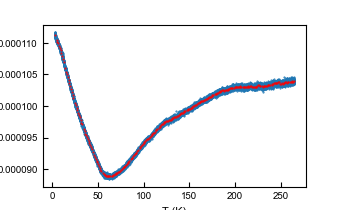

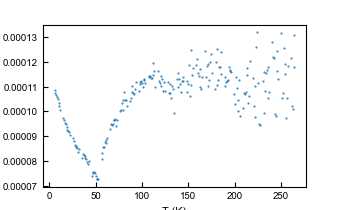

In [51]:
fpath = r'D:\2_Neutron_scattering\6_CaV2O4_D3_ILL_2023\VSM'
fname = r'CaV2O4-28_3_23_VSM_0P1T_MT.dat'
dat = np.genfromtxt(os.path.join(fpath, fname), usecols=[2,4], delimiter=',',skip_header=31)

latexify()
plt.figure()
plt.plot(dat[:,0],dat[:,1],'o',ms=0.5)
x,y,e = lin_binning(dat[:,0],dat[:,1],300)
plt.plot(x,y,'ro',ms=0.5)
plt.xlabel('T (K)')   
plt.ylabel('M (emu)')  
plt.savefig(os.path.join(fpath,'MT.pdf'),bbox_inches="tight",pad_inches=0.01)
plt.show()
plt.figure()
plt.plot(x, np.gradient(y*x,x),'o',ms=0.5)
plt.xlabel('T (K)')   
plt.ylabel('d(MT)/dT')  
plt.savefig(os.path.join(fpath,'dMTdT.pdf'),bbox_inches="tight",pad_inches=0.01)
plt.show()

[1. 1. 1. ... 1. 1. 1.]


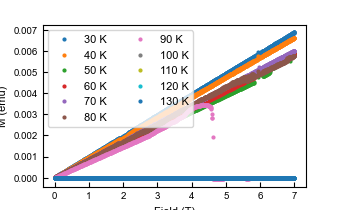

In [53]:
fpath = r'D:\2_Neutron_scattering\6_CaV2O4_D3_ILL_2023\VSM'
fname = r'CaV2O4-28_3_23_VSM_MH.dat'
dat = np.genfromtxt(os.path.join(fpath, fname), usecols=[2,3,4], delimiter=',',skip_header=31)

ts = [30,40,50,60,70,80,90,100,110,120,130]
temp = np.ones(dat.shape[0])
print(temp)
plt.figure()
for t in ts:
    mask = np.isclose(dat[:,0],temp*t, rtol=0.05)
    plt.plot(dat[mask,1]/10000,dat[mask,2],'o',ms=2, label='{:1.0f} K'.format(t))

plt.xlabel('Field (T)')   
plt.ylabel('M (emu)')   
plt.legend(ncols=2)
plt.savefig(os.path.join(fpath,'MH.pdf'),bbox_inches="tight",pad_inches=0.01)
plt.show()

In [35]:
plt.close('all')